#**BEJGAM PRANAV**
#**E22CSEU1196**
#**B40**

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:

# Define a 2D object (rectangle in this case)
rectangle = np.array([[0, 0], [0, 1], [2, 1], [2, 0]])

# Function to plot 2D object
def plot_object(points, title, color='blue'):
    points = np.vstack([points, points[0]])  # Close the shape
    plt.plot(points[:, 0], points[:, 1], color=color)
    plt.title(title)
    plt.grid()
    plt.axis('equal')

In [4]:
# Transformation matrices
def translation_matrix(tx, ty):
    return np.array([[1, 0, tx], [0, 1, ty], [0, 0, 1]])

def scaling_matrix(sx, sy):
    return np.array([[sx, 0, 0], [0, sy, 0], [0, 0, 1]])

def rotation_matrix(theta):
    rad = np.radians(theta)
    return np.array([[np.cos(rad), -np.sin(rad), 0], [np.sin(rad), np.cos(rad), 0], [0, 0, 1]])

def reflection_matrix(axis):
    if axis == 'x':
        return np.array([[1, 0, 0], [0, -1, 0], [0, 0, 1]])
    elif axis == 'y':
        return np.array([[-1, 0, 0], [0, 1, 0], [0, 0, 1]])
    elif axis == 'origin':
        return np.array([[-1, 0, 0], [0, -1, 0], [0, 0, 1]])

def shearing_matrix(shx, shy):
    return np.array([[1, shx, 0], [shy, 1, 0], [0, 0, 1]])

In [5]:

# Apply a transformation
def apply_transformation(points, transformation_matrix):
    # Add a third homogeneous coordinate (z=1) to the points
    homogeneous_points = np.hstack([points, np.ones((points.shape[0], 1))])
    transformed_points = homogeneous_points @ transformation_matrix.T
    return transformed_points[:, :2]

# Composite transformation (Translation + Rotation)
composite_matrix = translation_matrix(2, 3) @ rotation_matrix(45)

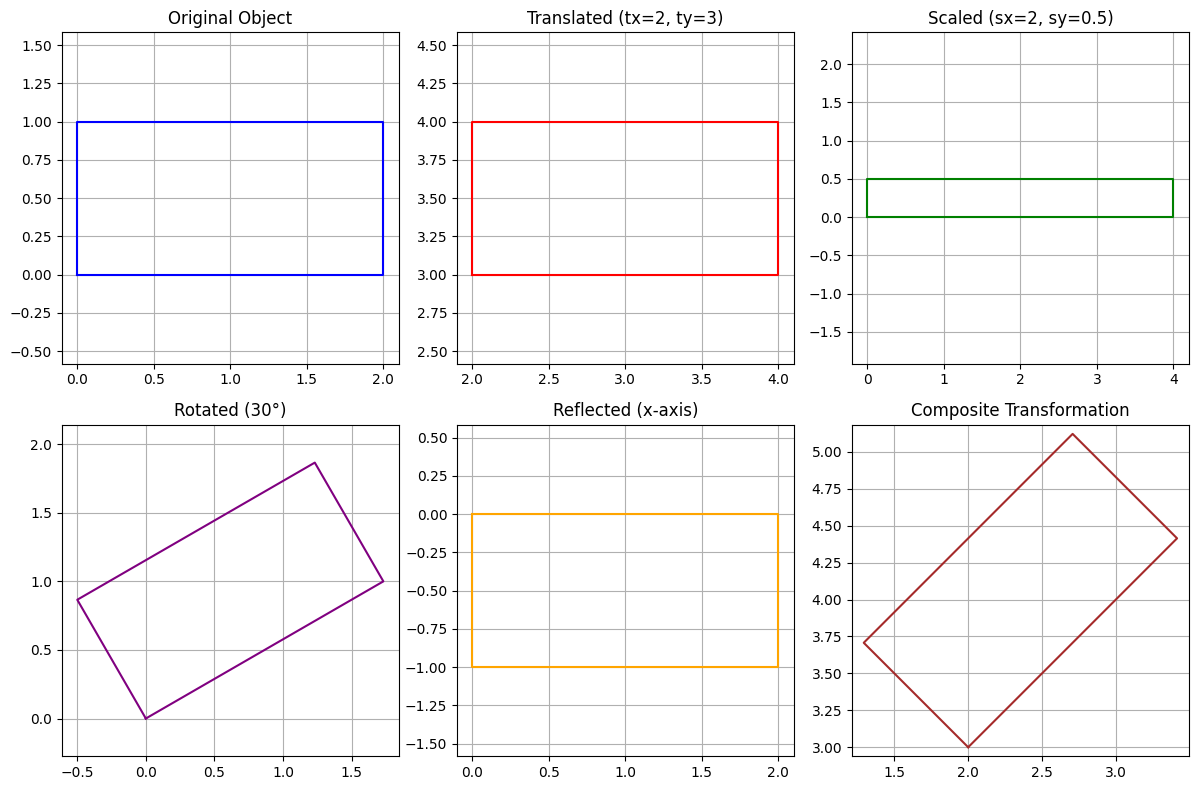

In [6]:

# Plot original and transformed object
plt.figure(figsize=(12, 8))

# Original
plt.subplot(2, 3, 1)
plot_object(rectangle, "Original Object")

# Translation
plt.subplot(2, 3, 2)
translated = apply_transformation(rectangle, translation_matrix(2, 3))
plot_object(translated, "Translated (tx=2, ty=3)", color='red')

# Scaling
plt.subplot(2, 3, 3)
scaled = apply_transformation(rectangle, scaling_matrix(2, 0.5))
plot_object(scaled, "Scaled (sx=2, sy=0.5)", color='green')

# Rotation
plt.subplot(2, 3, 4)
rotated = apply_transformation(rectangle, rotation_matrix(30))
plot_object(rotated, "Rotated (30°)", color='purple')

# Reflection
plt.subplot(2, 3, 5)
reflected = apply_transformation(rectangle, reflection_matrix('x'))
plot_object(reflected, "Reflected (x-axis)", color='orange')

# Composite Transformation
plt.subplot(2, 3, 6)
composite = apply_transformation(rectangle, composite_matrix)
plot_object(composite, "Composite Transformation", color='brown')

plt.tight_layout()
plt.show()


In [7]:

# Load the image
image = cv2.imread('/content/photo-1493238792000-8113da705763.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def show_image(image, title):
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [8]:
# Translation
def translate_image(image, tx, ty):
    rows, cols = image.shape[:2]
    translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
    return cv2.warpAffine(image, translation_matrix, (cols, rows))

In [9]:

# Rotation
def rotate_image(image, angle):
    rows, cols = image.shape[:2]
    center = (cols // 2, rows // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1)
    return cv2.warpAffine(image, rotation_matrix, (cols, rows))

In [10]:
# Scaling
def scale_image(image, fx, fy):
    return cv2.resize(image, None, fx=fx, fy=fy, interpolation=cv2.INTER_LINEAR)

In [11]:

# Reflection
def reflect_image(image, axis):
    if axis == 'x':
        return cv2.flip(image, 0)
    elif axis == 'y':
        return cv2.flip(image, 1)
    elif axis == 'both':
        return cv2.flip(image, -1)


In [12]:
# Shearing
def shear_image(image, shear_factor_x, shear_factor_y):
    rows, cols = image.shape[:2]
    shear_matrix = np.float32([[1, shear_factor_x, 0], [shear_factor_y, 1, 0]])
    return cv2.warpAffine(image, shear_matrix, (cols, rows))


In [13]:
# Cropping
def crop_image(image, x_start, y_start, width, height):
    return image[y_start:y_start+height, x_start:x_start+width]

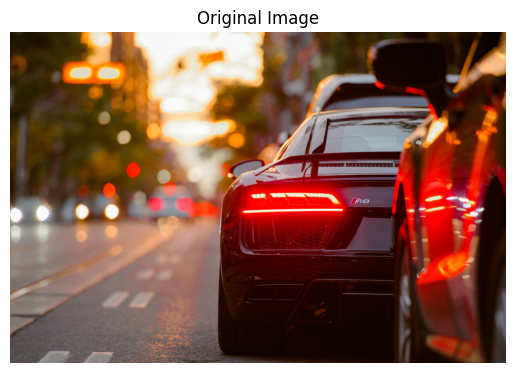

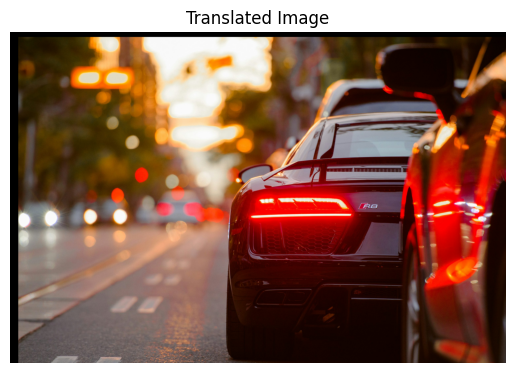

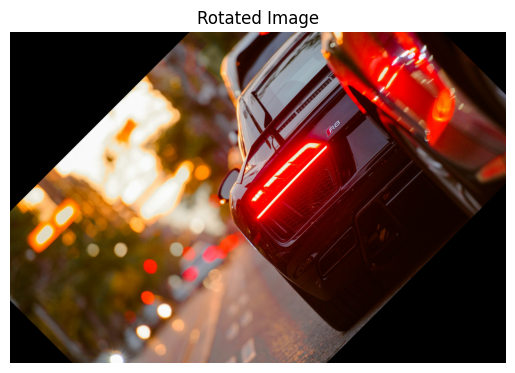

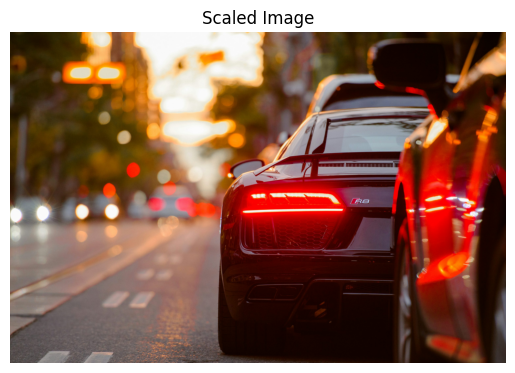

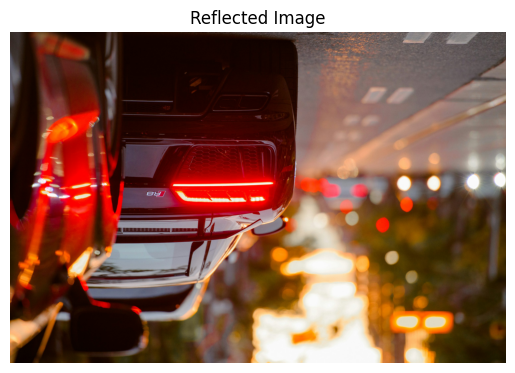

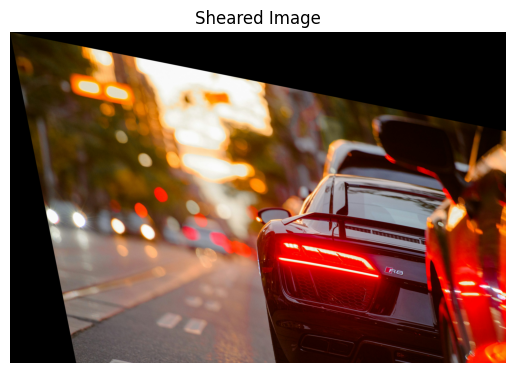

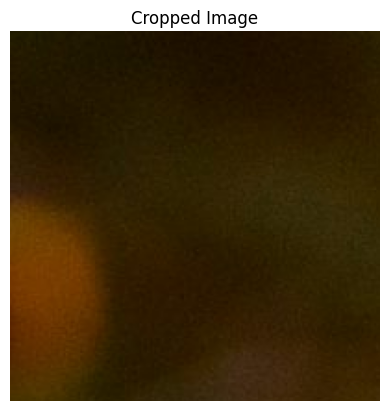

In [14]:

# Perform and display transformations
show_image(image, "Original Image")

translated_image = translate_image(image, 50, 30)
show_image(translated_image, "Translated Image")

rotated_image = rotate_image(image, 45)
show_image(rotated_image, "Rotated Image")

scaled_image = scale_image(image, 1.5, 1.5)
show_image(scaled_image, "Scaled Image")

reflected_image = reflect_image(image, 'both')
show_image(reflected_image, "Reflected Image")

sheared_image = shear_image(image, 0.2, 0.2)
show_image(sheared_image, "Sheared Image")

cropped_image = crop_image(image, 50, 50, 200, 200)
show_image(cropped_image, "Cropped Image")
